In [1]:
import os,shutil
import h5py
from h5glance import H5Glance
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors

## Setup input data

In [2]:
input_data = '../../../data/simulation/diffr10000.h5'

## Convert one frame to check

### Original

4.926256848667597e-06 0.001610326290854833 5.24636603084357e-12


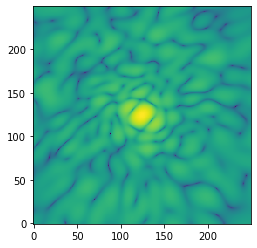

In [6]:
with h5py.File(input_data,'r') as fh:
    diffr = fh['data/0000001/diffr'][...]
    plt.imshow(diffr,norm=colors.LogNorm(vmin=diffr.min(), vmax=diffr.max()),origin='lower')
    print (diffr.mean(),diffr.max(),diffr.min())

### Set multiplication

In [12]:
multiplication = 1e7

### After multiplication

48.7788 16103 0


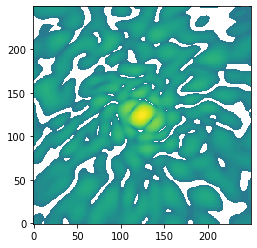

In [19]:
with h5py.File(input_data,'r') as fh:
    new_diffr = fh['data/0000001/diffr'][...]*multiplication
with h5py.File('tmp.h5','w') as f:
    f.create_dataset("diffr", data=new_diffr,dtype='i8')    
with h5py.File('tmp.h5','r') as fh:
    tmp_diffr = fh['diffr'][...]
    plt.imshow(tmp_diffr,norm=colors.LogNorm(vmin=tmp_diffr.min()+0.001, vmax=tmp_diffr.max()),origin='lower')
    print (tmp_diffr.mean(),tmp_diffr.max(),tmp_diffr.min())

## Convert whole frames